# Use Python to plot Surface graphs or irregular Datasets

Do you want to plot a surface graph of a 3D dataset but your data is not distributed on a regular meshgrid?<br>
No need to worry as **Matplotlib's trisurf** got you covered. Here is how to use it.

## First things first
Let's add the proper libraries, shall we?

In [601]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

## Generate the sample data
Create an irregular grid of (x,y) coordinates and the relative z-data

In [602]:
points = 500
data = np.zeros([points,3])
x = np.random.rand(points)*100
y = np.random.rand(points)*100
z = np.sinc((x-20)/100*3.14) + np.sinc((y-50)/100*3.14)

Plot the generated grid on a scatter graph, just to verify there is no cheating here...

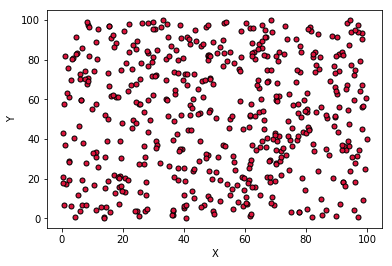

In [603]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x, y, marker=".", c="#DC143C", edgecolors="black", s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

Looks quite irregular to me. Let's continue

## Triangulation<br>
The first things to do is to use the (x,y) coordinates to subdivide the plane into a set of triangles.<br>
The **`Triangulation`** method uses the [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation) algorithm for the job and returns the object **`triang`**<br>

**`triang`** contains an unstructured triangular grid from (x,y) coordinates:
- **`(triang.x, triang.y)`** are the input (x,y) coordinates
- **`triang.triangles`** is an **`Array[nrOfTriangles, 3]`** in which each row indicates which 3 points from the grid were used to define each triangle. **`nrOfTriangles`** depends on the dataset and the triangulation algorithm.
- **`triang.mask`** can be used to mask out unwanted triangles

If you want to know more about the **`Triangulation`** method you can check Matplotlib's [API](https://matplotlib.org/api/tri_api.html#matplotlib.tri.Triangulation)

In [604]:
triang = mtri.Triangulation(x, y)

Let's have a look at the (x,y) coordinates and the triangles

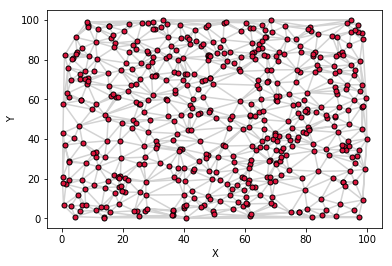

In [605]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="#DC143C", markeredgecolor="black", markersize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

Depending on the dataset and the algorithm used for the triangulation, some triangles might cause artifact in the 3D surface. In case that happens, it is possible to mask out some of them. In this example we eliminate the triangles for which at least one point is outside of an arbitrary boundary<br>

- **`isBad`** is an **`Array[points,]`** which contains for each (x,y) coordinate a boolean value indicating whether the point is outside (**`True`**) or inside (**`False`**) of a boundary condition.<br>

- **`mask`** is an **`Array[nrOfTriangles,]`** in which each boolean value indicates whether the respective triangles was defined using at least one point outside of the boundary.

In [606]:
isBad = np.where((x<1) | (x>99) | (y<1) | (y>99), True, False)

mask = np.any(isBad[triang.triangles],axis=1)
triang.set_mask(mask)

Let's plot again the 2D surface with the (x,y) coordinates and the new triangles. Note how some triangles at the periphery of the plane are now missing.

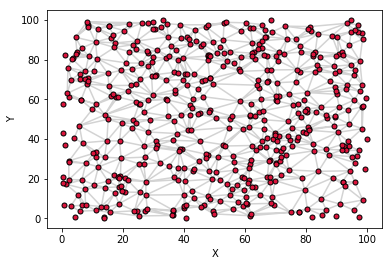

In [607]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="#DC143C", markeredgecolor="black", markersize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

Finally let's plot the 3D surface using **`plot_trisurf`**

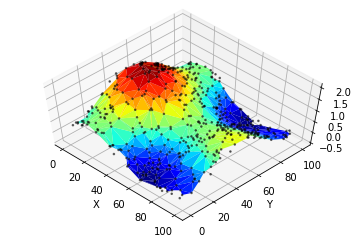

In [608]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, z, cmap='jet')
ax.scatter(x,y,z, marker='.', s=10, c="black", alpha=0.5)
ax.view_init(elev=60, azim=-45)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Enjoy!<br><br>

Fabrizio Guerrieri<br>
[www.fabrizioguerrieri.com](http://www.fabrizioguerrieri.com)